In [10]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '12363e8d-29c0-4f09-8fa4-eb56e53aca70',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-14T14:05:28.533Z', 'error_code': 0, 'error_message': None, 'elapsed': 79, 'credit_count': 1, 'notice': None, 'total_count': 8926}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10494, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [11]:
import pandas as pd
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/tb/ysz4rfq13h78lv6c5yldlh9h0000gn/T/ipykernel_8306/3696177438.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951338e+07,1.951338e+07,False,NaN,1,NaN,NaN,None,2023-10-14T14:03:00.000Z,26906.656737,8.334033e+09,-40.2492,0.044808,0.310900,-3.675461,1.301136,-8.267156,-11.261863,5.250398e+11,49.9150,5.650398e+11,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
1,1027,Ethereum,ETH,ethereum,7549,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202564e+08,1.202564e+08,True,NaN,2,NaN,NaN,None,2023-10-14T14:03:00.000Z,1551.754780,3.765910e+09,-20.4993,0.089105,0.269735,-5.492724,-4.446972,-15.600834,-19.650900,1.866084e+11,17.7394,1.866084e+11,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
2,825,Tether USDt,USDT,tether,63685,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,None,2023-10-14T14:03:00.000Z,1.000104,1.352930e+10,-34.2762,0.021908,-0.006452,-0.040150,-0.009784,0.156438,-0.013730,8.353572e+10,7.9425,8.663470e+10,None,2023-10-14T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-14 14:05:59.836681
3,1839,BNB,BNB,bnb,1681,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538449e+08,1.538449e+08,False,NaN,4,NaN,NaN,None,2023-10-14T14:03:00.000Z,206.268008,2.596818e+08,-9.1366,0.052034,0.014550,-3.192061,-3.172035,-13.609685,-17.003014,3.173329e+10,3.0172,3.173329e+10,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,None,2023-10-14T14:03:00.000Z,0.486112,4.835308e+08,-30.8270,-0.105756,0.497760,-7.028440,0.237492,-22.368215,-34.968060,2.597832e+10,2.4696,4.861120e+10,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
5,3408,USDC,USDC,usd-coin,14447,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.511852e+10,2.511852e+10,False,NaN,6,NaN,NaN,None,2023-10-14T14:03:00.000Z,1.000159,1.720979e+09,-22.6423,0.012557,-0.025006,0.014462,-0.017010,0.012731,0.031813,2.512250e+10,2.3888,2.512250e+10,None,2023-10-14T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-14 14:05:59.836681
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.161263e+08,5.598577e+08,True,NaN,7,NaN,NaN,None,2023-10-14T14:03:00.000Z,21.942132,2.714933e+08,13.3962,0.068114,1.781493,-6.585523,16.053079,-11.463474,-22.580515,9.130698e+09,0.8680,1.228447e+10,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.520843e+10,3.625937e+10,False,NaN,8,NaN,NaN,None,2023-10-14T14:03:00.000Z,0.246942,9.029367e+07,-2.5741,-0.073426,-0.056306,-4.526002,-1.387875,-14.432460,-22.982776,8.694426e+09,0.8267,1.111237e+10,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
8,74,Dogecoin,DOGE,dogecoin,806,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

In [14]:
def api_runner():
    global df # Declares it as a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '12363e8d-29c0-4f09-8fa4-eb56e53aca70',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)



#     df2 = pd.json_normalize(data['data'])
#     df2['timestamp'] = pd.to_datetime('now')
#     df = df.append(df2)
 # Use this if you want to create a csv and append data to it
        df = pd.json_normalize(data['data'])
        df['timestamp'] = pd.to_datetime('now')
        df

    if not os.path.isfile(r'/Users/ewoyi/Projects/Python Projects/API.csv'):
        df.to_csv(r'/Users/ewoyi/Projects/Python Projects/API.csv', header= 'column_names')
    else:
        df.to_csv(r'/Users/ewoyi/Projects/Python Projects/API.csv', mode='a', header=False)
    
   
    

In [15]:
#  this will give us the ability to track the time
import os
from time import time
from time import sleep

for i in range(333): # there are only 333 runs per day
    api_runner()
    print('API Completed!') 
    sleep(60) # to run it after every 60 seconds
exit()

API Completed!
API Completed!
API Completed!


KeyboardInterrupt: 

In [16]:
df3 = pd.read_csv(r'/Users/ewoyi/Projects/Python Projects/API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.951338e+07,1.951338e+07,False,NaN,1,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,26906.656737,8.334033e+09,-40.2492,0.044808,0.310900,-3.675461,1.301136,-8.267156,-11.261863,5.250398e+11,49.9150,5.650398e+11,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
1,1,1027,Ethereum,ETH,ethereum,7549,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202564e+08,1.202564e+08,True,NaN,2,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,1551.754780,3.765910e+09,-20.4993,0.089105,0.269735,-5.492724,-4.446972,-15.600834,-19.650900,1.866084e+11,17.7394,1.866084e+11,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
2,2,825,Tether USDt,USDT,tether,63685,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.352701e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,1.000104,1.352930e+10,-34.2762,0.021908,-0.006452,-0.040150,-0.009784,0.156438,-0.013730,8.353572e+10,7.9425,8.663470e+10,NaN,2023-10-14T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-14 14:05:59.836681
3,3,1839,BNB,BNB,bnb,1681,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538449e+08,1.538449e+08,False,NaN,4,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,206.268008,2.596818e+08,-9.1366,0.052034,0.014550,-3.192061,-3.172035,-13.609685,-17.003014,3.173329e+10,3.0172,3.173329e+10,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
4,4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,0.486112,4.835308e+08,-30.8270,-0.105756,0.497760,-7.028440,0.237492,-22.368215,-34.968060,2.597832e+10,2.4696,4.861120e+10,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
5,5,3408,USDC,USDC,usd-coin,14447,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.511852e+10,2.511852e+10,False,NaN,6,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,1.000159,1.720979e+09,-22.6423,0.012557,-0.025006,0.014462,-0.017010,0.012731,0.031813,2.512250e+10,2.3888,2.512250e+10,NaN,2023-10-14T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-14 14:05:59.836681
6,6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.161263e+08,5.598577e+08,True,NaN,7,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,21.942132,2.714933e+08,13.3962,0.068114,1.781493,-6.585523,16.053079,-11.463474,-22.580515,9.130698e+09,0.8680,1.228447e+10,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
7,7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.520843e+10,3.625937e+10,False,NaN,8,NaN,NaN,NaN,2023-10-14T14:03:00.000Z,0.246942,9.029367e+07,-2.5741,-0.073426,-0.056306,-4.526002,-1.387875,-14.432460,-22.982776,8.694426e+09,0.8267,1.111237e+10,NaN,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
8,8,74,Dogecoin,DOGE,dogecoin,806,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'med

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10494,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19513381.00000,19513381.00000,False,NaN,1,NaN,NaN,None,2023-10-14T14:03:00.000Z,26906.65674,8334033162.97880,-40.24920,0.04481,0.31090,-3.67546,1.30114,-8.26716,-11.26186,525039844341.38647,49.91500,565039791472.79004,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
1,1027,Ethereum,ETH,ethereum,7549,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120256370.71745,120256370.71745,True,NaN,2,NaN,NaN,None,2023-10-14T14:03:00.000Z,1551.75478,3765909947.83311,-20.49930,0.08911,0.26973,-5.49272,-4.44697,-15.60083,-19.65090,186608398093.48453,17.73940,186608398093.48001,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
2,825,Tether USDt,USDT,tether,63685,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83527007239.14531,86625667477.81340,True,NaN,3,NaN,NaN,None,2023-10-14T14:03:00.000Z,1.00010,13529301108.47794,-34.27620,0.02191,-0.00645,-0.04015,-0.00978,0.15644,-0.01373,83535718095.32047,7.94250,86634701486.75999,None,2023-10-14T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-14 14:05:59.836681
3,1839,BNB,BNB,bnb,1681,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153844945.15988,153844945.15988,False,NaN,4,NaN,NaN,None,2023-10-14T14:03:00.000Z,206.26801,259681768.49717,-9.13660,0.05203,0.01455,-3.19206,-3.17203,-13.60969,-17.00301,31733290337.20588,3.01720,31733290337.21000,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
4,52,XRP,XRP,xrp,1114,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,None,2023-10-14T14:03:00.000Z,0.48611,483530843.04725,-30.82700,-0.10576,0.49776,-7.02844,0.23749,-22.36822,-34.96806,25978324326.30087,2.46960,48611199293.82000,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
5,3408,USDC,USDC,usd-coin,14447,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25118520283.50500,25118520283.50500,False,NaN,6,NaN,NaN,None,2023-10-14T14:03:00.000Z,1.00016,1720979230.50975,-22.64230,0.01256,-0.02501,0.01446,-0.01701,0.01273,0.03181,25122504798.66002,2.38880,25122504798.66000,None,2023-10-14T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-14 14:05:59.836681
6,5426,Solana,SOL,solana,535,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,416126295.86354,559857748.62211,True,NaN,7,NaN,NaN,None,2023-10-14T14:03:00.000Z,21.94213,271493310.94150,13.39620,0.06811,1.78149,-6.58552,16.05308,-11.46347,-22.58052,9130698220.34270,0.86800,12284472766.57000,None,2023-10-14T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-14 14:05:59.836681
7,2010,Cardano,ADA,cardano,946,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35208425070.13200,36259372926.66300,False,NaN,8,NaN,NaN,None,2023-10-14T14:03:00.000Z,0.24694,90293666.83384,-2.57410,-0.07343,-0.05631,-4.52600,-1.38788,-14.43246,-22.98278,8694425882.54556,0.82670,11112373357.66000,None,2023-10-14T14:03:00.000Z

In [20]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [21]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.04481,0.31090,-3.67546,1.30114,-8.26716,-11.26186
Ethereum,0.08911,0.26973,-5.49272,-4.44697,-15.60083,-19.65090
Tether USDt,0.02191,-0.00645,-0.04015,-0.00978,0.15644,-0.01373
BNB,0.05203,0.01455,-3.19206,-3.17203,-13.60969,-17.00301
XRP,-0.10576,0.49776,-7.02844,0.23749,-22.36822,-34.96806
USDC,0.01256,-0.02501,0.01446,-0.01701,0.01273,0.03181
Solana,0.06811,1.78149,-6.58552,16.05308,-11.46347,-22.58052
Cardano,-0.07343,-0.05631,-4.52600,-1.38788,-14.43246,-22.98278
Dogecoin,0.00216,1.10111,-3.44836,-3.88381,-19.72323,-16.46972


In [22]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.04481
             quote.USD.percent_change_24h     0.31090
             quote.USD.percent_change_7d     -3.67546
             quote.USD.percent_change_30d     1.30114
             quote.USD.percent_change_60d    -8.26716
             quote.USD.percent_change_90d   -11.26186
Ethereum     quote.USD.percent_change_1h      0.08911
             quote.USD.percent_change_24h     0.26973
             quote.USD.percent_change_7d     -5.49272
             quote.USD.percent_change_30d    -4.44697
             quote.USD.percent_change_60d   -15.60083
             quote.USD.percent_change_90d   -19.65090
Tether USDt  quote.USD.percent_change_1h      0.02191
             quote.USD.percent_change_24h    -0.00645
             quote.USD.percent_change_7d     -0.04015
             quote.USD.percent_change_30d    -0.00978
             quote.USD.percent_change_60d     0.15644
             quote.USD.percent_change_90

In [24]:
type(df5)

pandas.core.series.Series

In [25]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.04481
            quote.USD.percent_change_24h   0.31090
            quote.USD.percent_change_7d   -3.67546
            quote.USD.percent_change_30d   1.30114
            quote.USD.percent_change_60d  -8.26716
            quote.USD.percent_change_90d -11.26186
Ethereum    quote.USD.percent_change_1h    0.08911
            quote.USD.percent_change_24h   0.26973
            quote.USD.percent_change_7d   -5.49272
            quote.USD.percent_change_30d  -4.44697
            quote.USD.percent_change_60d -15.60083
            quote.USD.percent_change_90d -19.65090
Tether USDt quote.USD.percent_change_1h    0.02191
            quote.USD.percent_change_24h  -0.00645
            quote.USD.percent_change_7d   -0.04015
            quote.USD.percent_change_30d  -0.00978
            quote.USD.percent_change_60d   0.15644
            quote.USD.percent_change_90d  -0.01373
BNB         quote.USD.percent_change_1h    0.05203
            quote.USD.percent_change_24h   0.01455
            quote.USD.percent_change_7d   -3.19206
            quote.USD.percent_change_30d  -3.17203
            quote.USD.percent_change_60d -13.60969
            quote.USD.percent_change_90d -17.00301
XRP         quote.USD.percent_change_1h   -0.10576
            quote.USD.percent_change_24h   0.49776
            quote.USD.percent_change_7d   -7.02844
            quote.USD.percent_change_30d   0.23749
            quote.USD.percent_change_60d -22.36822
            quote.USD.percent_change_90d -34.96806
USDC        quote.USD.percent_change_1h    0.01256
            quote.USD.percent_change_24h  -0.02501
            quote.USD.percent_change_7d    0.01446
            quote.USD.percent_change_30d  -0.01701
            quote.USD.percent_change_60d   0.01273
            quote.USD.percent_change_90d   0.03181
Solana      quote.USD.percent_change_1h    0.06811
            quote.USD.percent_change_24h   1.78149
            quote.USD.percent_change_7d   -6.58552
            quote.USD.percent_change_30d  16.05308
            quote.USD.percent_change_60d -11.46347
            quote.USD.percent_change_90d -22.58052
Cardano     quote.USD.percent_change_1h   -0.07343
            quote.USD.percent_change_24h  -0.05631
            quote.USD.percent_change_7d   -4.52600
            quote.USD.percent_change_30d  -1.38788
            quote.USD.percent_change_60d -14.43246
            quote.USD.percent_change_90d -22.98278
Dogecoin    quote.USD.percent_change_1h    0.00216
            quote.USD.percent_change_24h   1.10111
            quote.USD.percent_change_7d   -3.44836
            quote.USD.percent_change_30d  -3.88381
            quote.USD.percent_change_60d -19.72323
            quote.USD.percent_change_90d -16.46972
TRON        quote.USD.percent_change_1h    0.08119
            quote.USD.percent_change_24h  -0.20138
            quote.USD.percent_change_7d   -3.09521
            quote.USD.percent_change_30d   3.14272
            quote.USD.percent_change_60d  10.94768
            quote.USD.percent_change_90d   6.82276
Toncoin     quote.USD.percent_change_1h   -0.16039
            quote.USD.percent_change_24h  -0.74148
            quote.USD.percent_change_7d   -7.36931
            quote.USD.percent_change_30d   2.99718
            quote.USD.percent_change_60d  30.60835
            quote.USD.percent_change_90d  43.06684
Dai         quote.USD.percent_change_1h    0.02699
            quote.USD.percent_change_24h  -0.00356
            quote.USD.percent_change_7d    0.01115
            quote.USD.percent_change_30d  -0.01372
            quote.USD.percent_change_60d   0.06684
            quote.USD.percent_change_90d   0.02894
Polygon     quote.USD.percent_change_1h    0.18256
            quote.USD.percent_change_24h   0.94230
            quote.USD.percent_change_7d   -9.40048
            quote.USD.percent_change_30d  -0.76093
            quote.USD.percent_change_60d -22.85485
            quo

In [37]:
index = pd.Index(range(90))
df7 = df6.set_index(index)

In [38]:
df7

,values
0,0.04481
1,0.31090
2,-3.67546
3,1.30114
4,-8.26716
5,-11.26186
6,0.08911
7,0.26973
8,-5.49272
9,-4.44697


In [39]:
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.04481
1,Bitcoin,quote.USD.percent_change_24h,0.31090
2,Bitcoin,quote.USD.percent_change_7d,-3.67546
3,Bitcoin,quote.USD.percent_change_30d,1.30114
4,Bitcoin,quote.USD.percent_change_60d,-8.26716
5,Bitcoin,quote.USD.percent_change_90d,-11.26186
6,Ethereum,quote.USD.percent_change_1h,0.08911
7,Ethereum,quote.USD.percent_change_24h,0.26973
8,Ethereum,quote.USD.percent_change_7d,-5.49272
9,Ethereum,quote.USD.percent_change_30d,-4.44697


In [40]:
df8 = df7.rename(columns={'level_1': 'percentage_change'})
df8

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.04481
1,Bitcoin,quote.USD.percent_change_24h,0.31090
2,Bitcoin,quote.USD.percent_change_7d,-3.67546
3,Bitcoin,quote.USD.percent_change_30d,1.30114
4,Bitcoin,quote.USD.percent_change_60d,-8.26716
5,Bitcoin,quote.USD.percent_change_90d,-11.26186
6,Ethereum,quote.USD.percent_change_1h,0.08911
7,Ethereum,quote.USD.percent_change_24h,0.26973
8,Ethereum,quote.USD.percent_change_7d,-5.49272
9,Ethereum,quote.USD.percent_change_30d,-4.44697


In [47]:
df8['percentage_change'] = df8['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1hr','24hr', '7d', '30d', '60d', '90d'])

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

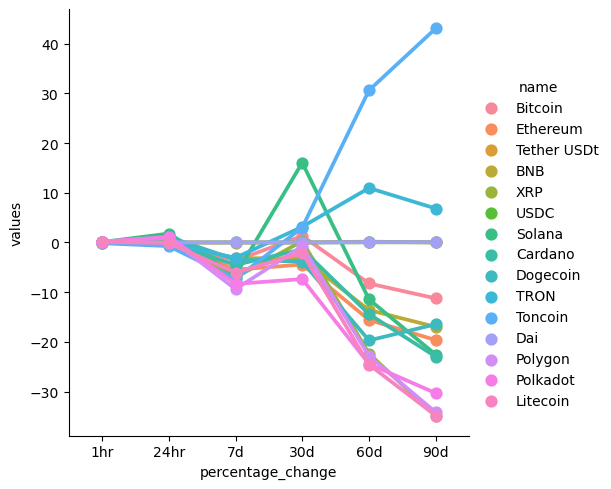

In [49]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df8, kind='point')

# Creating a Dataframe with the Columns of our Choice

In [50]:
df9 = df[['name','quote.USD.price','timestamp']]
# df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,26906.65674,2023-10-14 14:05:59.836681
1,Ethereum,1551.75478,2023-10-14 14:05:59.836681
2,Tether USDt,1.00010,2023-10-14 14:05:59.836681
3,BNB,206.26801,2023-10-14 14:05:59.836681
4,XRP,0.48611,2023-10-14 14:05:59.836681
5,USDC,1.00016,2023-10-14 14:05:59.836681
6,Solana,21.94213,2023-10-14 14:05:59.836681
7,Cardano,0.24694,2023-10-14 14:05:59.836681
8,Dogecoin,0.05927,2023-10-14 14:05:59.836681
9,TRON,0.08543,2023-10-14 14:05:59.836681


In [52]:
df9 = df[['name','quote.USD.price']]
# df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price
0,Bitcoin,26906.65674
1,Ethereum,1551.75478
2,Tether USDt,1.00010
3,BNB,206.26801
4,XRP,0.48611
5,USDC,1.00016
6,Solana,21.94213
7,Cardano,0.24694
8,Dogecoin,0.05927
9,TRON,0.08543


In [53]:
df10 = df9.set_index('name')

In [54]:
df10

,quote.USD.price
name,
Bitcoin,26906.65674
Ethereum,1551.75478
Tether USDt,1.00010
BNB,206.26801
XRP,0.48611
USDC,1.00016
Solana,21.94213
Cardano,0.24694
Dogecoin,0.05927


<Axes: title={'center': 'Currency Prices'}, xlabel='Name', ylabel='Price (USD)'>

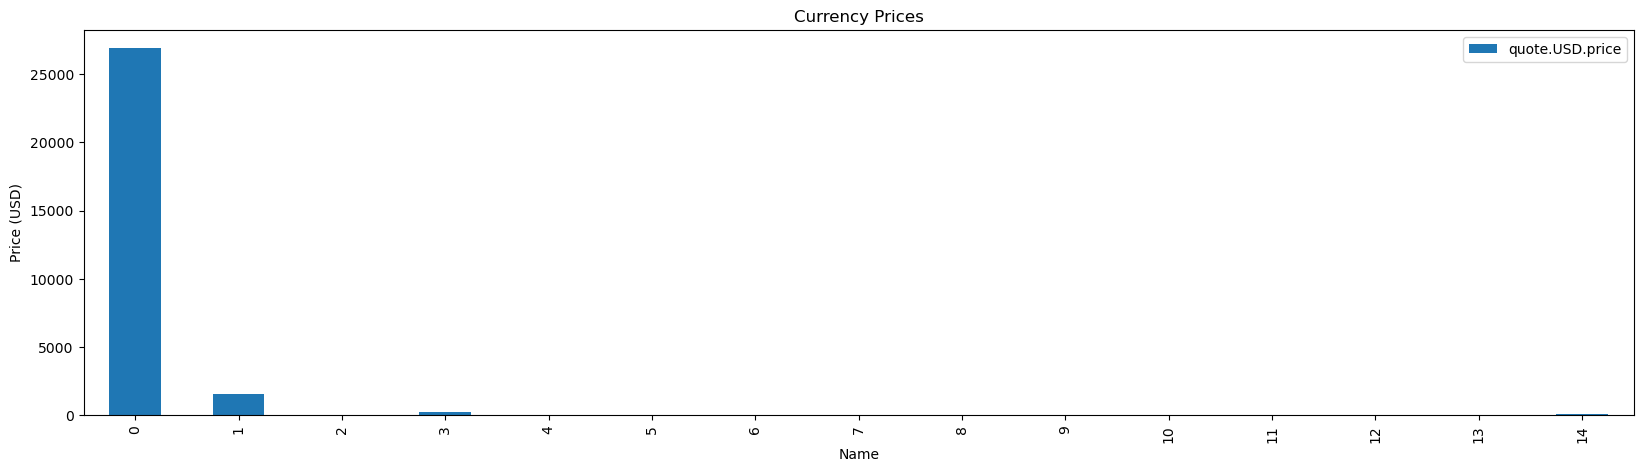

In [56]:
df9.plot(kind='bar', stacked = True, figsize=(20,5), title = "Currency Prices", ylabel = 'Price (USD)', xlabel = 'Name')